- 평균 차이에 대한 추정, 랜덤화 설계
- 평균 차이에 대한 추정, 쌍체비교 설계
- 정규분포의 분산의 추정

# 가설 검정

요인수준 1의 관측치: $y_{11}, y_{12},...,y_{1n_1}$  
요인수준 2의 관측치: $y_{21}, y_{22},...,y_{1n_2}$

$$
y_{ij}=\mu_i + \epsilon_{ij}\begin{cases}
i=1,2 \\
j=1,2,...,n_i
\end{cases}
$$
$$
\epsilon_{ij} \sim N(0,\sigma_i^2)
$$

## 통계적 가설

__Statistical Hypothesis__  
- 데이터를 분석하거나 연구를 수행할 때 검증하고자 하는 주장
- 확률분포의 모수 또는 모형의 모수에 대해 주로 가설을 세운다.
- 귀무가설(Null Hypothesis, H0): 연구자가 검증하고자 하는 주장의 반대 개념. 일반적으로 '변화가 없다', '차이가 없다', '효과가 없다' 등의 주장을 의미한다.
- 대립가설(Alternative Hypothesis, H1): 연구자가 검증하고자 하는 주장. 일반적으로 '변화가 있다', '차이가 있다', '효과가 있다' 등의 주장을 의미한다.

$$
H_0: \mu_1=\mu_2 \\
H_1: \mu_1\neq\mu_2 \\
H_1: \mu_1 > \mu_2 \\
H_1: \mu_1 < \mu_2
$$

### 가설검정의 오류

제 1종 오류: 귀무가설이 사실일 때 귀무가설을 기각하는 오류  
제 2종 오류: 귀무가설이 사실이 아닐 때 귀무가설을 채택하는 오류

검정력(Power of the test)
- 대립가설이 실제로 참일 때 이를 올바르게 발견할 확률.
- $1-\beta$로 계산된다.

신뢰수준(Significance Level)
- 특정 신뢰구간이 실제 모수를 포함할 확률
- $1-\alpha$로 계산된다.

$$
\alpha = P(\text{제1종오류}) = P(H_0\text{기각}|\text{귀무가설 사실})=\text{유의수준}\\
\beta=P(\text{제2종오류})=P(H_0\text{채택}|\text{귀무가설 거짓}) \\
1-\alpha=\text{신뢰구간}=P(H_0\text{채택}|\text{귀무가설 사실}) \\
1-\beta=\text{검정력}=P(H_0\text{기각}|\text{귀무가설 거짓})
$$

### 두 표본 t검정(Two-sample t-test)

두 집단 간의 평균 차이를 검정하는 통계적 방법  
두 집단의 분산이 같다고 가정  
$|t_0|> t_{\alpha/2, n_1 + n_2 -2}$이면, H0기각 후 두 집단 간의 평균 차이가 난다고 결론짓는다.

t-검정통계량(정규성 가정)

$$
t_0 = \frac{\bar{y_1}-\bar{y_2}}{S_p \sqrt{1/n_1 + 1/n_2}}
$$

합동표본분산(등분산성 가정)
$$
S^2_p = \frac{(n_1 -1)S_1^2 + (n_2 -1)S_2^2}{n_1 + n_2 -2}
$$

z-통계량(모분산 $\sigma$를 알 때)
$$
Z_0 = \frac{\bar{y_1}-\bar{y_2}}{\sigma \sqrt{1/n_1 + 1/n_2}}
$$

### 가설 검정에서 p-value의 사용

__p-value__:
- 주어진 가설 검정에서 귀무가설이 참일 경우, 관찰된 통계량보다 같거나 더 극단적인 값을 얻을 확률
- p-value $\le$ 유의수준: 귀무가설 기각
- p-value $\ge$ 유의수준: 귀무가설 채택
- 유의수준은 일반적으로 0.05(5%) 또는 0.01(1%)로 설정한다.

### t검정에서 가정 확인하기

두 표본을 비교할 때, 각각의 관측치를 작은 값에서 큰 값으로 순서대로 정렬한다.  
점들이 직선을 따라 그려지면 가설(정규분포)의 모형이 적절하고, 직선에서 많이 벗어나 있을수록 가설의 모형이 부적절하다.

## 랜덤화 검정(Randomization test)

비모수적 검정 방법  
- 데이터의 실제 구조나 분포에 대한 가정 없이 무작위로 데이터의 배치를 바꿔가며 검정을 수행한다.  

실제 데이터에서 통계량을 계산한 후, 데이터를 무작위로 재배열하여 통계량을 여러 번 계산하고, 이 통계량의 분포를 통해 귀무가설 하에서의 통계량의 분포를 추정한다.

실제 평균 차이: 8.80
p-value: 0.0073


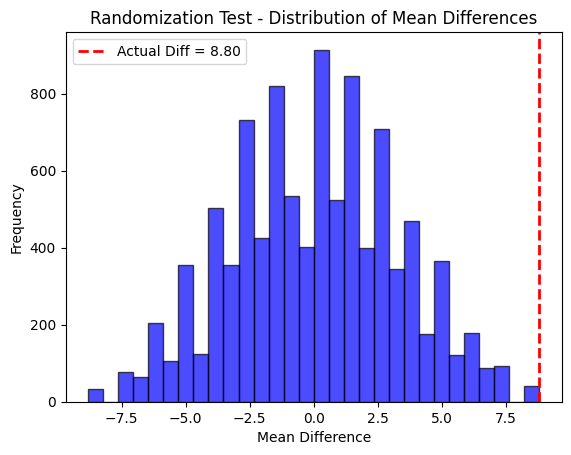

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터
group_A = np.array([85, 88, 90, 92, 87])
group_B = np.array([78, 82, 80, 81, 77])

# 두 집단의 평균 차이 계산
mean_diff = np.mean(group_A) - np.mean(group_B)
print(f"실제 평균 차이: {mean_diff:.2f}")

# 랜덤화 검정 함수
def randomization_test(group_A, group_B, num_iterations=1000):
    combined_data = np.concatenate([group_A, group_B])
    n_A = len(group_A)
    random_diffs = []
    
    for _ in range(num_iterations):
        np.random.shuffle(combined_data)
        rand_group_A = combined_data[:n_A]
        rand_group_B = combined_data[n_A:]
        random_diffs.append(np.mean(rand_group_A) - np.mean(rand_group_B))
    
    return np.array(random_diffs)

# 랜덤화 검정 실행
num_iterations = 10000
random_diffs = randomization_test(group_A, group_B, num_iterations)

# 결과 출력
p_value = np.sum(np.abs(random_diffs) >= np.abs(mean_diff)) / num_iterations
print(f"p-value: {p_value:.4f}")

# 시각화
plt.hist(random_diffs, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(mean_diff, color='red', linestyle='dashed', linewidth=2, label=f'Actual Diff = {mean_diff:.2f}')
plt.title('Randomization Test - Distribution of Mean Differences')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## 신뢰 구간

통계적 추정에서 모수의 값을 포함할 것으로 예상되는 범위를 나타낸다.  
표본 데이터에서 추정한 값의 정확성과 신뢰성을 제공하며, 추정치가 실제 모집단 파라미터를 포함할 확률을 기반으로 만들어진다.

- 추정치(Estimate): 표본 데이터로부터 계산된 통계량
- 신뢰하한(Lower confidence limit): 신뢰구간이 모수를 포함할 것으로 예상되는 최소값
- 신뢰상한(Upper confidence limit): 신뢰구간이 모수를 포함할 것으로 예상되는 최대값
- 오차범위(Margin of Error): 추정치의 신뢰구간 상한과 하한 사이의 거리

$$ P(L \leq \theta \leq U) = 1 - \alpha  $$

$$ L \leq \theta \leq U  $$

$$ 
P \left( \overline{Y}_1 - \overline{Y}_2 - t_{\alpha/2, n_1 + n_2 - 2} S_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}} 
\leq \mu_1 - \mu_2 \\
\leq \overline{Y}_1 - \overline{Y}_2 + t_{\alpha/2, n_1 + n_2 - 2} S_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}} \right) \\
= 1 - \alpha  
$$

$$ \overline{Y}_1 - \overline{Y}_2 - t_{\alpha/2, n_1 + n_2 - 2} S_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}} \\
\leq \mu_1 - \mu_2 \\
\leq \overline{Y}_1 - \overline{Y}_2 + t_{\alpha/2, n_1 + n_2 - 2} S_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}  
$$


## $\sigma_1^2 \neq \sigma_2^2$ 인 경우

두 분산이 같다고 가정할 수 없는 경우 (Welch의 t-검정) 
$$
H_0: \mu_1 = \mu_2 \\
H_1: \mu_1 \neq \mu_2
$$

$$
t_0 = \frac{\overline{y}_1 - \overline{y}_2}{\sqrt{S_1^2/n_1 + S_2^2/n_2}}
$$

$$
v = \frac{(S_1^2/n_1 + S_2^2/n_2)^2}{\frac{(S_1^2/n_1)^2}{n_1-1}+\frac{(S_2^2/n_2)^2}{n_2-1}}
$$

## $\sigma_1^2$와 $\sigma_2^2$를 아는 경우

두 분산이 알려진 경우(z-검정)

$$
Z_0=\frac{\overline{y}_1-\overline{y}_2}{\sqrt{\sigma_1^2/n_1 + \sigma_2^2/n_2}}
$$

$$
\overline{y}_1 - \overline{y}_2 - Z_{\alpha/2} \sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}} 
\leq \mu_1 - \mu_2 
\leq \overline{y}_1 - \overline{y}_2 + Z_{\alpha/2} \sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}
$$


## 특정한 값과 단일 평균의 비교

$$
H_0: \mu_1 = \mu_0 \\
H_1: \mu_1 \neq \mu_0
$$

$$
Z_0 = \frac{\overline{y} - \mu_0}{\sigma / \sqrt{n}}
$$

$$
\overline{y} - Z_{\alpha/2} \frac{\sigma}{\sqrt{n}} \leq \mu \leq \overline{y} + Z_{\alpha/2} \frac{\sigma}{\sqrt{n}}
$$


# 분산을 아는 경우의 평균 검정

$$
\begin{array}{|c|c|c|c|}
\hline
\text{가설} & \text{검정통계} & \text{고정 유의수준에서의 기각역} & P \text{값} \\
\hline
H_0: \mu = \mu_0 & Z_0 = \frac{\overline{Y} - \mu_0}{\sigma / \sqrt{n}} & |Z_0| > Z_{\alpha/2} & P = 2[1 - \Phi(|Z_0|)] \\
H_1: \mu \neq \mu_0 & & & \\
\hline
H_0: \mu = \mu_0 & Z_0 = \frac{\overline{Y} - \mu_0}{\sigma / \sqrt{n}} & Z_0 < -Z_\alpha & P = \Phi(Z_0) \\
H_1: \mu < \mu_0 & & & \\
\hline
H_0: \mu = \mu_0 & Z_0 = \frac{\overline{Y} - \mu_0}{\sigma / \sqrt{n}} & Z_0 > Z_\alpha & P = 1 - \Phi(Z_0) \\
H_1: \mu > \mu_0 & & & \\
\hline
H_0: \mu_1 = \mu_2 & Z_0 = \frac{\overline{Y}_1 - \overline{Y}_2}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}} & |Z_0| > Z_{\alpha/2} & P = 2[1 - \Phi(|Z_0|)] \\
H_1: \mu_1 \neq \mu_2 & & & \\
\hline
H_0: \mu_1 = \mu_2 & Z_0 = \frac{\overline{Y}_1 - \overline{Y}_2}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}} & Z_0 < -Z_\alpha & P = \Phi(Z_0) \\
H_1: \mu_1 < \mu_2 & & & \\
\hline
H_0: \mu_1 = \mu_2 & Z_0 = \frac{\overline{Y}_1 - \overline{Y}_2}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}} & Z_0 > Z_\alpha & P = 1 - \Phi(Z_0) \\
H_1: \mu_1 > \mu_2 & & & \\
\hline
\end{array}
$$

# 분산을 모르는 경우의 평균 검정

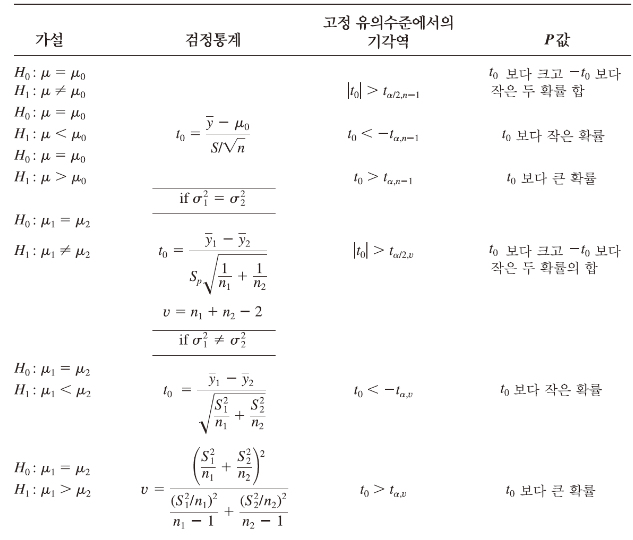

## 쌍체비교 문제

짝을 이루는 두 개의 데이터 세트를 비교하는 문제
- 독립적인 데이터가 아니다.
- 동일한 대상에 대해 두 번 측정한 데이터
- 한 집단에 두 가지 조건에서 측정된 경우

$$
d_j = y_{1j} - y_{2j}, \quad j = 1, 2, \dots, 10
$$

$$
t_0 = \frac{\overline{d}}{S_d / \sqrt{n}}
$$

$$
\overline{d} = \frac{1}{n} \sum_{j=1}^{n} d_j
$$

$$
S_d = \left[ \frac{\sum_{j=1}^{n} (d_j - \overline{d})^2}{n - 1} \right]^{1/2} = \left[ \frac{\sum_{j=1}^{n} d_j^2 - \frac{1}{n} \left( \sum_{j=1}^{n} d_j \right)^2}{n - 1} \right]^{1/2}
$$


# 연습문제

## 교재 2.16  
섬유의 파괴강도는 최소한 150psi 정도는 되어야 한다. 과거의 실험에서 파괴강도의 표준편차가 3psi라고 알려졌다. 견본 4개의 확률표본을 실험한 결과가 145, 153, 150, 147이다.

(a) 실험에서 검정되어야 한다고 생각하는 가설을 기술하라.

(b) $\alpha=0.05$를 이용해 이 가설을 검정해라.

(c) P값을 구해라.

(d) 95% 신뢰구간을 구해라.

(a): 섬유의 파괴강도가 150psi 이상이라고 할 수 있는지 없는지 확인해야 한다.
$$
H_0: \mu_0 \le 150 \\
H_1: \mu_1 > 150
$$

(b): 가설 검정

In [19]:
import numpy as np
import scipy.stats as st

y = np.array([145, 153, 150, 147])

sample_mean = np.mean(y)
population_mean = 150
std_dev = 3
n = np.count_nonzero(y)

stats = (sample_mean - population_mean) / (std_dev / (n ** 0.5))

pvalue = 1 - st.norm.cdf(abs(stats))

print(f't-통계량: {stats}')
print(f'P값: {pvalue}')
if pvalue >= 0.05:
    print('귀무가설을 기각할 수 없다.')
else:
    print('귀무가설을 기각할 수 있다.')

t-통계량: -0.8333333333333334
P값: 0.20232838096364314
귀무가설을 기각할 수 없다.


(c): P값은 0.2023 정도

(d): 95% 신뢰구간

$$
\overline{X} - Z_{0.025} \times \frac{\sigma}{\sqrt{N}} < \mu < \overline{X} + Z_{0.025} \times \frac{\sigma}{\sqrt{N}}
$$

In [22]:
Zs = np.array(st.norm.interval(confidence=0.95, loc = stats, scale=std_dev))

confint = sample_mean + Zs 
print(f'Z 값: {Zs}')
print(f'(신뢰하한, 신뢰상한): {confint}')

Z 값: [-6.71322529  5.04655862]
(신뢰하한, 신뢰상한): [142.03677471 153.79655862]
